In [3]:
# 匯入 Keras 及相關模組
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [6]:
# 匯入 Keras 模組
from keras.datasets import mnist

In [8]:
# 第一次執行下載 mnist 資料
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [11]:
# 查看 mnist 資料
print('train data =', len(x_train_image))
print(' test data =', len(x_test_image))

train data = 60000
 test data = 10000


In [12]:
# 訓練資料是由 images 與 labels 所組成
print('x_train_image: ', x_train_image.shape)
print('y_train_label: ', y_train_label.shape)

x_train_image:  (60000, 28, 28)
y_train_label:  (60000,)


In [16]:
# 定義 plot_image 函數顯示數字影像
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()

    # 設定顯示圖形的大小
    fig.set_size_inches(2, 2)

    # binary 代表以黑白灰階顯示
    plt.imshow(image, cmap='binary')
    plt.show()

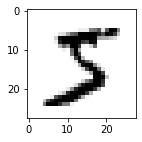

In [17]:
# 執行 plot_image 函數查看第 0 筆數字影像
plot_image(x_train_image[0])

In [18]:
# 查看第 0 筆 labels 資料
y_train_label[0]

5

In [21]:
# 建立 plot_images_labels_prediction() 函數
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()

    # 設定顯示圖形的大小
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(num):

        # 建立 subgraph 為 5 * 5
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label = ' + str(labels[idx])
        if len(prediction) > 0:
            title += ', predict = ' + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)

        # 設定不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

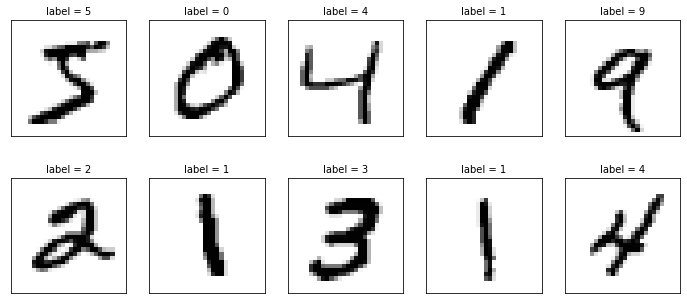

In [22]:
# 查看訓練資料前 10 筆資料
plot_images_labels_prediction(x_train_image, y_train_label, [], 0)

In [23]:
# 查看測試資料
print('x_test_image: ', x_test_image.shape)
print('y_test_label: ', y_test_label.shape)

x_test_image:  (10000, 28, 28)
y_test_label:  (10000,)


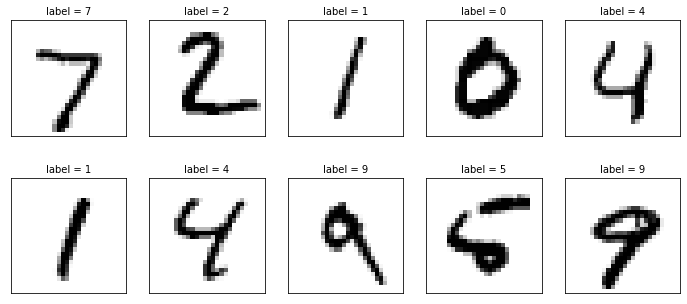

In [24]:
# 查看測試資料前 10 筆資料
plot_images_labels_prediction(x_test_image, y_test_label, [], 0)

In [25]:
# 查看 image 的 shape
print('x_train_image: ', x_train_image.shape)
print('y_train_label: ', y_train_label.shape)

x_train_image:  (60000, 28, 28)
y_train_label:  (60000,)


In [27]:
# 將 image 以 reshpae 轉換
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

In [28]:
# 查看轉換為 1 維向量的 shape
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)

x_train:  (60000, 784)
x_test:  (10000, 784)


In [29]:
# 查看 images 影像的內容
# 0 ~ 255 代表圖形每一個點的灰階深淺
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
# 將數字影像 image 的數字標準化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [31]:
# 查看數字影像 image 的數字標準化後的結果
# 原本介於 0 ~ 255 的數字被標準化為 0 ~ 1
x_train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
# 查看原本的 label 標籤欄位
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
# 將 label 執行 One-hot encoding 轉換
# to_categorical() 會將矩陣轉成 2 進位（只有 0 跟 1）
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

In [38]:
# 查看執行 One-hot encoding 轉換之後的 label 標籤欄位
y_train_one_hot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)